In [1]:
#import Pandas, NumPy, and Matplotlib libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sbn

#Import data file
df = pd.read_csv(r'C:\Users\jesst\OneDrive\Desktop\Capstone\2022 pers QBE.csv')

In [2]:
#Check the data types
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1593 entries, 0 to 1592
Data columns (total 3 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   Calc YR Salary             1593 non-null   object
 1   Yearly PERS Contributions  1593 non-null   object
 2   Age                        1593 non-null   int64 
dtypes: int64(1), object(2)
memory usage: 37.5+ KB


In [3]:
#Check data to see how many tuples have a null value
df.isna().sum()

Calc YR Salary               0
Yearly PERS Contributions    0
Age                          0
dtype: int64

In [4]:
#Convert data in columns from string to float
cleaned_data = (df[['Age', 'Calc YR Salary', 'Yearly PERS Contributions']].replace( '[\$,) ]+','',regex=True ).replace( '[(]','-',regex=True ).astype(float))
cleaned_data.head()

,Age,Calc YR Salary,Yearly PERS Contributions
0,36.0,131820.43,40836.16
1,18.0,70699.09,21899.79
2,26.0,119490.28,37012.20
3,38.0,126717.01,39203.57
4,61.0,125525.01,38790.15


In [5]:
#Split data columns into separate data files for plotting
age = cleaned_data.loc[:, 'Age'].values
yr_salary = cleaned_data.loc[:, 'Calc YR Salary'].values
pers_contributions = cleaned_data.loc[:, 'Yearly PERS Contributions'].values

(array([    0., 10000., 20000., 30000., 40000., 50000.]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

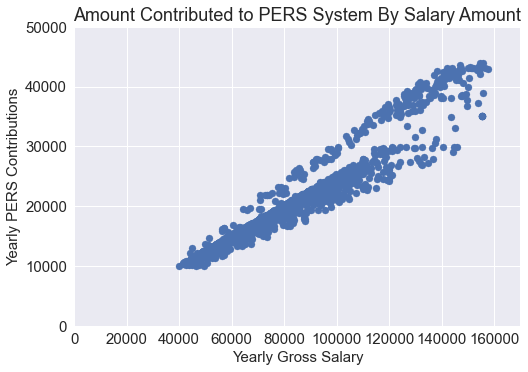

In [6]:
#Create scatter plot showing linear correlation of 'yearly salary' and 'pers contribution' values and evaluation of data points
plt.style.use('seaborn')
plt.scatter(yr_salary, pers_contributions)
plt.xlim(left = 0, right = 170000)  # <-- changes the graph length
plt.ylim(bottom = 0, top = 50000) # <-- changes the graph height
plt.xlabel('Yearly Gross Salary', fontsize = 15) #<-- changes the graph x label
plt.ylabel('Yearly PERS Contributions', fontsize = 15) #<-- changes the graph y label
plt.title('Amount Contributed to PERS System By Salary Amount', fontsize = 18) #<--adds a title to the graph 
plt.xticks(fontsize = 15)
plt.yticks(fontsize = 15)

(array([    0., 10000., 20000., 30000., 40000., 50000.]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

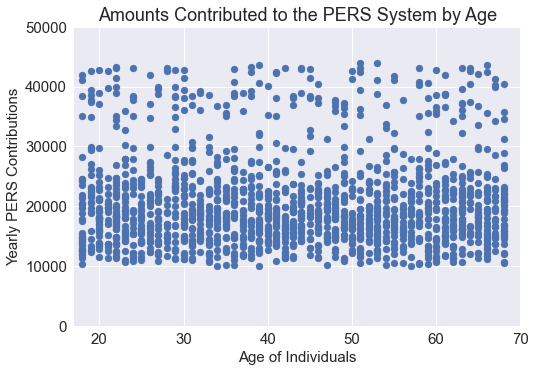

In [7]:
#Create scatter plot showing correlation of 'age' and 'pers contribution' values for evaluation of data points
plt.scatter(age, pers_contributions)
plt.xlim(left = 17, right = 70)  # <-- changes the graph length
plt.ylim(bottom = 0, top = 50000) # <-- changes the graph height
plt.xlabel('Age of Individuals', fontsize = 15) #<-- changes the graph x label
plt.ylabel('Yearly PERS Contributions', fontsize = 15) #<-- changes the graph y label
plt.title('Amounts Contributed to the PERS System by Age', fontsize = 18) #<--adds a title to the graph 
plt.xticks(fontsize = 15)
plt.yticks(fontsize = 15)

(array([  0.,  50., 100., 150., 200., 250., 300., 350., 400.]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

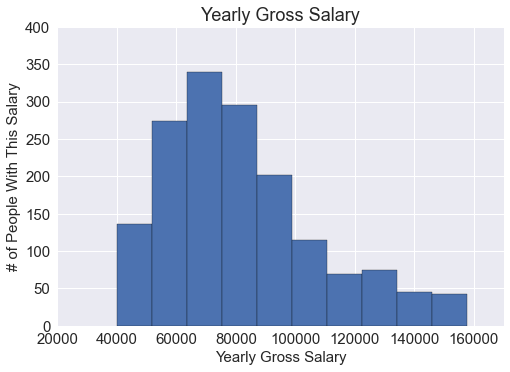

In [8]:
#Create histogram showing 'yearly salary' for evaluation
cleaned_data['Calc YR Salary'].hist(edgecolor = 'black')
plt.xlim(left = 20000, right = 170000)  # <-- changes the graph length
plt.ylim(bottom = 0, top = 400) # <-- changes the graph height
plt.xlabel('Yearly Gross Salary', fontsize = 15) #<-- changes the graph x label
plt.ylabel('# of People With This Salary', fontsize = 15) #<-- changes the graph y label
plt.title('Yearly Gross Salary', fontsize = 18) #<--adds a title to the graph 
plt.xticks(fontsize = 15)
plt.yticks(fontsize = 15)

(array([  0.,  50., 100., 150., 200., 250., 300., 350., 400.]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

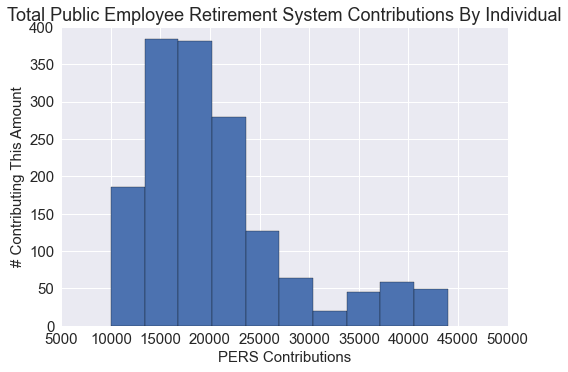

In [9]:
#Create histogram showing 'pers contributions' for evaluation
cleaned_data['Yearly PERS Contributions'].hist(edgecolor = 'black')
plt.xlim(left = 5000, right = 50000)  # <-- changes the graph length
plt.ylim(bottom = 0, top = 400) # <-- changes the graph height
plt.xlabel('PERS Contributions', fontsize = 15) #<-- changes the graph x label
plt.ylabel('# Contributing This Amount', fontsize = 15) #<-- changes the graph y label
plt.title('Total Public Employee Retirement System Contributions By Individual', fontsize = 18) #<--adds a title to the graph 
plt.xticks(fontsize = 15)
plt.yticks(fontsize = 15)

In [10]:
#Import the TrainTestSplit class 
from sklearn.model_selection import train_test_split as tts

#Split the data into X and y sets(X = features, y = labels)
X = cleaned_data.drop("Yearly PERS Contributions", axis=1)
y = cleaned_data["Yearly PERS Contributions"]

#Split the data into test and training sets
X_train, X_test, y_train, y_test = tts(X, y, test_size = 0.2)

# 2. Choose the right algorithm

In [11]:
#Import the RandomForestRegressor class
from sklearn.linear_model import LinearRegression

regr = LinearRegression()

In [12]:
#Fit the linear Regression model using the training data
regr.fit(X_train, y_train)

LinearRegression()

In [13]:
#Test the RandomForestRegressor model using the test data and get the score
regr.score(X_test, y_test)

0.9241411866472129

# 3. Use trained model to make predictions

In [14]:
#Use 'predict' on just the first 10 values in 'X_test' dataset to see what the model gives
results = regr.predict(X_test[:10])
results

array([12419.30065512, 15623.45442985, 12413.58228875, 22583.51329601,
       14546.40943964, 27779.71176673, 18631.86276921, 24371.70184914,
       14638.71389721, 12979.00786437])

(array([    0., 10000., 20000., 30000., 40000., 50000.]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

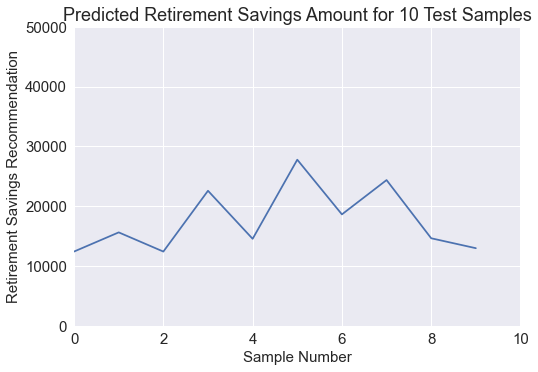

In [15]:
#Create line graph showing 'predict()' values for evaluation
plt.plot(results)
plt.xlim(left = 0, right = 10)  # <-- changes the graph length
plt.ylim(bottom = 0, top = 50000) # <-- changes the graph height
plt.xlabel('Sample Number', fontsize = 15) #<-- changes the graph x label
plt.ylabel('Retirement Savings Recommendation', fontsize = 15) #<-- changes the graph y label
plt.title('Predicted Retirement Savings Amount for 10 Test Samples', fontsize = 18) #<--adds a title to the graph 
plt.xticks(fontsize = 15)
plt.yticks(fontsize = 15)

In [16]:
#Compare predicted amounts to the truth labels to evaluate the model
y_preds = regr.predict(X_test)
np.array(y_preds)

array([12419.30065512, 15623.45442985, 12413.58228875, 22583.51329601,
       14546.40943964, 27779.71176673, 18631.86276921, 24371.70184914,
       14638.71389721, 12979.00786437, 17300.5501493 , 17958.45729299,
       20098.48255525, 15317.08343728, 30791.14860406, 18510.63132551,
       28503.52725549, 16469.50568624, 23124.90260403, 25514.59302457,
       29875.08682722, 17405.30589465, 21258.73767351, 25821.78057181,
       10692.13995965, 16854.29899484, 15552.24427032, 21789.46197605,
       11461.14495859, 14400.05574005, 36964.90466999, 34458.15536433,
       39822.10837676, 17450.81651737, 14426.80598124, 17321.53278401,
       31827.58894955,  9719.93931619, 37912.48014843, 20799.97437466,
       12481.07544722, 24300.21375575, 21946.58185676, 25358.70963682,
       27301.81046131, 16869.18286061, 24302.47415928, 18656.89903017,
       21544.84367139, 16704.59872901, 33751.20837967, 17943.87884251,
       20200.46364144, 38760.82856314, 18434.14128466, 14008.74562953,
      

(array([ 5000., 10000., 15000., 20000., 25000., 30000., 35000., 40000.,
        45000.]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

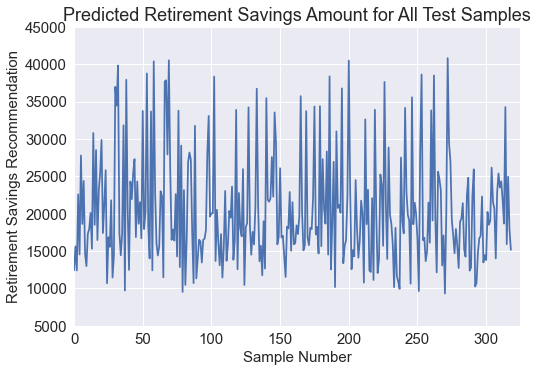

In [17]:
#Create line graph showing 'predict()' values for evaluation, to make sure there are no very low or very high predictions
plt.plot(y_preds)
plt.xlim(left = 0, right = 325)  # <-- changes the graph length
plt.ylim(bottom = 5000, top = 45000) # <-- changes the graph height
plt.xlabel('Sample Number', fontsize = 15) #<-- changes the graph x label
plt.ylabel('Retirement Savings Recommendation', fontsize = 15) #<-- changes the graph y label
plt.title('Predicted Retirement Savings Amount for All Test Samples', fontsize = 18) #<--adds a title to the graph 
plt.xticks(fontsize = 15)
plt.yticks(fontsize = 15)

In [18]:
#Import 'mean_absolute_error' to evaluate accuracy of the Linear Regression model
from sklearn.metrics import mean_absolute_error
mean_absolute_error(y_preds, y_test)

1407.9378928292338

In [26]:
#Web UI using pywebio
import pywebio
from pywebio.input import *
from pywebio.output import *

def retirement_ui():
    
    #user input fields creation for getting user's 'age' and 'gross yearly salary' values to pass to the predict() function
    age = input("Please enter your age as a number: ", type = NUMBER)
    salary = input("please enter your gross yearly salary as a number: ", type = NUMBER)
    
    age_entry = int(age)
    salary_entry = int(salary)
    data_set = {'col1': [age_entry, salary_entry]}
    entry = pd.DataFrame(data=data_set)
    
    reshaped_entry = entry.to_numpy().T

    #pass user inputs to predict() function
    estimate = regr.predict(reshaped_entry) 
    this_estimate = float(estimate)

    #Output results to the screen
    put_text('Your ideal amount to be putting away for retirement each year is: ')
    put_text(this_estimate)
    
retirement_ui()    

C:\Users\jesst\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
